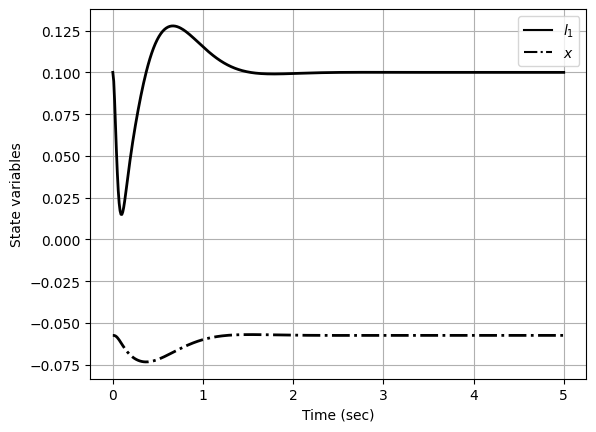

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import place_poles, StateSpace, impulse

# Define matrices
A = np.array([[0, 0, 1, -1, 0],
              [0, 0, 1, 0, 0],
              [-10, 0, -2, 2, 0],
              [720, -660, 12, -12, 0],
              [1, 0, 0, 0, 0]])
b1 = np.array([0, 0, 0.00333, -0.02, 0]).reshape(-1, 1)
b2 = np.array([0, -1, 0, 0, 0]).reshape(-1, 1)
b3 = np.array([0, 0, 0, 0, 1]).reshape(-1, 1)

# Desired pole locations
pd = np.array([-5, -25+25j, -25-25j, -3+3j, -3-3j])

# Calculate the state feedback gain matrix k
k = place_poles(A, b1, pd).gain_matrix.flatten()

# Closed loop system
Acl = A - b1 @ k.reshape(1, -1)
Bcl = 0.1 * b2
C = np.eye(5)
D = np.zeros((5, 1))
ld = 0.1

# Create state-space system
sys = StateSpace(Acl, Bcl, C, D)

# Simulate impulse response
t = np.linspace(0, 5, 500)  # 500 points within 5 seconds
t, y = impulse(sys, T=t)

# Plotting
plt.plot(t, y[:, 0] + ld, 'k', label='$l_1$')
plt.plot(t, y[:, 4] - 0.574 * ld, 'k-.', label='$x$')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.gca().set_prop_cycle(None)  # Reset the color cycle
for line in plt.gca().get_lines():
    line.set_linewidth(2)
plt.show()
